In [7]:
## import packages required for NLP tasks
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import numpy as np
from datasets import load_dataset

## Load the CNN/DailyMail dataset 

In [8]:
## Load the CNN/Dailymail dataset
ds = load_dataset("cnn_dailymail", "3.0.0")

README.md:   0%|          | 0.00/15.6k [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [9]:
for split in ["train", "validation", "test"]:
    print(split, len(ds[split]))

train 287113
validation 13368
test 11490


In [12]:
# View the first 3 texts and their highlights
for i in range(3):
    print("Article:", ds["train"][i]["article"])
    print("Highlights:", ds["train"][i]["highlights"])
    print("---")

Article: LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don't plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don't think I'll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office chart. Detai

In [17]:
## Read the combined_news.csv file
df_gamenews = pd.read_csv("combined_news_text.csv")

In [21]:
len(df_gamenews)

852

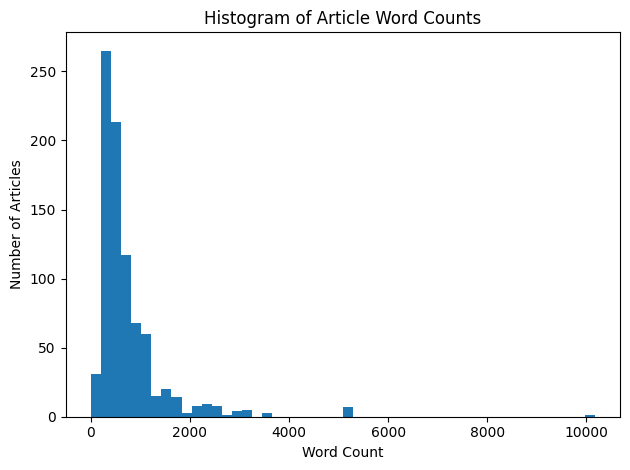

In [24]:
df_gamenews['word_count'] = df_gamenews['full_text'].fillna("").str.split().str.len()

# 3) Plot histogram
plt.figure()
plt.hist(df_gamenews['word_count'], bins=50)
plt.title('Histogram of Article Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Number of Articles')
plt.tight_layout()

# 4) Show (or save) the figure
plt.show()
# plt.savefig("word_count_histogram.png")  # uncomment to save to file

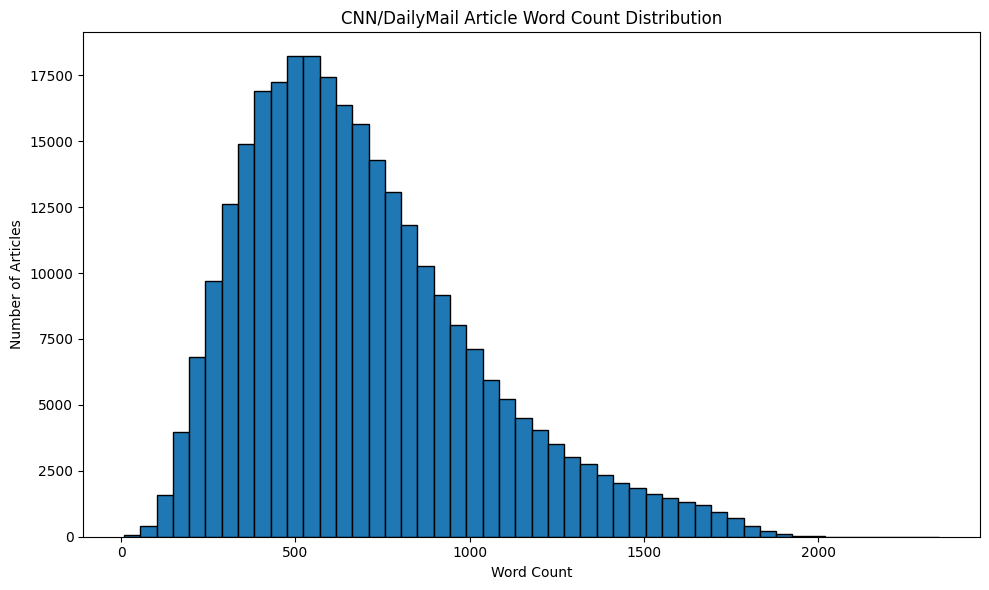

In [26]:
dataset = load_dataset("cnn_dailymail", "3.0.0", split="train")

# Choose whether to analyze the full articles or the highlights:
# For full articles, use dataset["article"]
# For abstracts (gold summaries), use dataset["highlights"]
text_data = dataset["article"]  # change to "highlights" if needed

# Compute word counts for each text entry (splitting on whitespace)
word_counts = [len(text.split()) for text in text_data]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=50, edgecolor="black")
plt.title("CNN/DailyMail Article Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Number of Articles")
plt.tight_layout()
plt.show()

Number of rows after filtering: 805


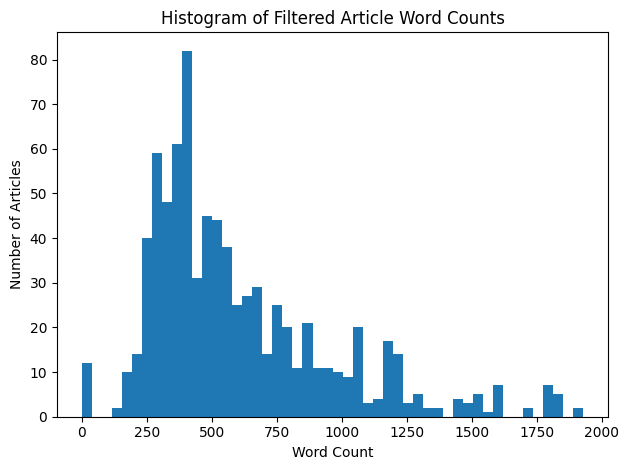

In [28]:
## Filter the df_gamenews dataset where the word count is less than 1000
df_gamenews_filtered = df_gamenews[df_gamenews['word_count'] < 2000]
# Reset index after filtering
df_gamenews_filtered.reset_index(drop=True, inplace=True)
# Check the number of rows after filtering
print("Number of rows after filtering:", len(df_gamenews_filtered))
# draw the histogram again
plt.figure()
plt.hist(df_gamenews_filtered['word_count'], bins=50)
plt.title('Histogram of Filtered Article Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()

In [29]:
# store the filtered dataset to a new CSV file
df_gamenews_filtered.to_csv("filtered_combined_news_text.csv", index=False)